# Tarea 7
## Splines Cúbicos

### Celeste Lascano

1\. Dados los puntos (0,1),(1,5),(2,3), determine el spline cúbico.

Dado que tenemos 3 puntos, tendremos dos splines cubicos.

$$ S_0 = a_0 + b_0(x-x_0) + c_0(x-x_0)^2 + d_0(x-x_0)^3 $$
$$ S_1 = a_1 + b_1(x-x_1) + c_1(x-x_1)^2 + d_1(x-x_1)^3 $$

Por lo cual tendremos 8 parámetros que encontrar. 

En primer lugar, encontramos las 8 ecuaciones para realizar el sistema de ecuaciones y asi encontrar los 8 parámetros.

$ [1] S_0(x_0) = y_0 $

$$ [1] a_0 = 1 $$


$ [2] S_0(x_1) = y_1 $

$ [2] a_0 + b_0 + c_0 + d_0 = 5 $

$$ [2] b_0 + c_0 + d_0 = 4 $$


$ [3] S_1(x_1) = y_1 $

$$ [3] a_1 = 5 $$


$ [4] S_1(x_2) = y_2 $

$ [4] a_1 + b_1 + c_1 + d_1 = 3 $

$$ [4] b_1 + c_1 + d_1 = -2 $$


$ [5] S_0' (x_1) = S_1' (X_1) $

$$ [5] b_0 + 2c_0 + 3d_0 = b_1 $$


$ [6] S_0'' (x_1) = S_1'' (X_1) $

$$ [6] 2c_0 + 3d_0 = 2c_1 $$


$ [7a] S_0''(X_0) = 0 $

$$ [7a] c_0 = 0 $$


$ [8a] S_1'' (X_2) = 0 $

$$ [8a] 2c_1 + 6d_1 = 0 $$


Los parámetros serían:

$ a_0 = 1 $

$ b_0 = \frac{11}{2} $

$ c_0 = 0 $

$ d_0 = -\frac{3}{2} $

$ a_1 = 5 $

$ b_1 = 1 $

$ c_1 = -\frac{9}{2} $

$ d_1 = \frac{3}{2} $

Por tanto, los splines serían:

$$ S_0 = 1 + \frac{11}{2}(x) + -\frac{3}{2}(x)^3 $$
$$ S_1 = 5 + 1(x-1) - \frac{9}{2}(x-1)^2 + \frac{1}{2}(x-1)^3 $$



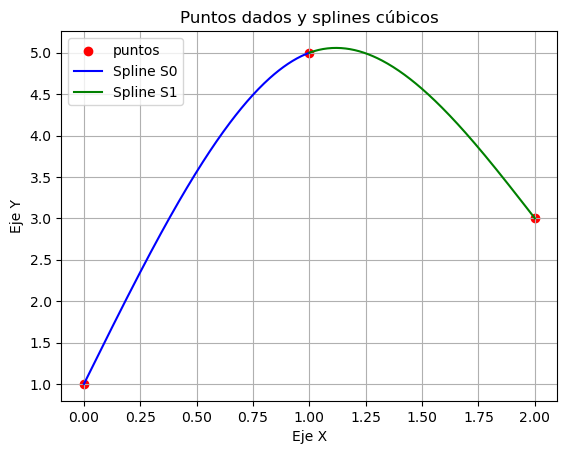

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x = [0,1,2]
y = [1,5,3]

plt.scatter(x, y, color='red', label= 'puntos')

x1 = np.linspace(0, 1, 200)
y1 = 1+11/2*(x1)-3/2*(x1)**3

plt.plot(x1, y1, label='Spline S0', color='blue')

x2 = np.linspace(1, 2, 200)
y2 = 5 + 1*(x2-1)-9/2*(x2-1)**2+3/2*(x2-1)**3

plt.plot(x2, y2, label='Spline S1', color='green')

plt.title('Puntos dados y splines cúbicos')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.legend()
plt.grid(True)
plt.show()

2\. Dado que tenemos 2 puntos, tendremos un spline cúbico.

$$ S_0 = a_0 + b_0(x-x_0) + c_0(x-x_0)^2 + d_0(x-x_0)^3 $$


Por lo cual tendremos 4 parámetros que encontrar. 

En primer lugar, encontramos las 4 ecuaciones para realizar el sistema de ecuaciones y asi encontrar los 8 parámetros.

$ [1] S_0(x_0) = y_0 $

$$ [1] a_0 = 1 $$


$ [2] S_0(x_1) = y_1 $

$ [2] a_0 + 2b_0 + 4c_0 + 8d_0 = 3 $

$$ [2] 2b_0 + 4c_0 + 8d_0 = 2 $$


$ [3] S_0' (x_0) = 1 $

$$ [3] b_0 = 1 $$


$ [4] S_0'' (x_1) = 2 $

$ [4] b_0 + 4c_0 + 12d_0 = 2 $

$$ [4] 4c_0 + 12d_0 = 1 $$





Los parámetros serían:

$ a_0 = 1 $

$ b_0 = 1 $

$ c_0 = -\frac{1}{2} $

$ d_0 = \frac{1}{4} $



Por lo tanto el spline cúbico sería:

$$ S_0 = 1 + 1(x+1) + -\frac{1}{2}(x+1)^2 + \frac{1}{4}(x+1)^3 $$

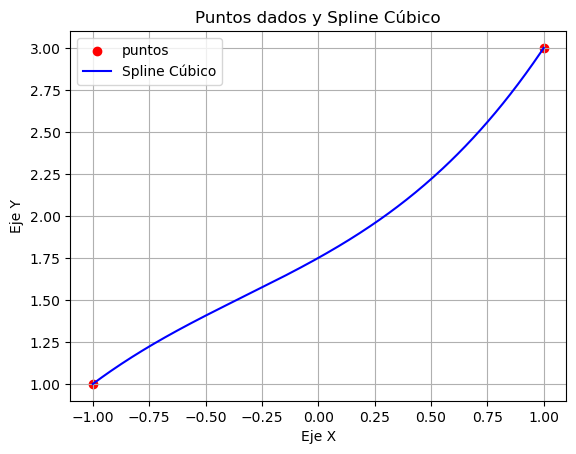

In [2]:
import matplotlib.pyplot as plt
import numpy as np

x = [-1,1]
y = [1,3]

plt.scatter(x, y, color='red', label= 'puntos')

xx = np.linspace(-1, 1, 300)
yy = 1 + 1*(xx+1)-1/2*(xx+1)**2 + 1/4*(xx+1)**3

plt.plot(xx, yy, label='Spline Cúbico', color='blue')

plt.title('Puntos dados y Spline Cúbico')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.legend()
plt.grid(True)
plt.show()

# Función para Splines Cúbicos completa

In [ ]:
import sympy as sym
from IPython.display import display

def cubic_spline(xs: list[float], ys: list[float]) -> list[sym.Expr]:
    
    points = sorted(zip(xs, ys), key=lambda t: t[0])
    xs = [p[0] for p in points]
    ys = [p[1] for p in points]

    n = len(xs) - 1
    h = [xs[i+1] - xs[i] for i in range(n)]

    
    alpha = [0]*(n+1)
    for i in range(1, n):
        alpha[i] = (3/h[i])*(ys[i+1]-ys[i]) - (3/h[i-1])*(ys[i]-ys[i-1])

    
    l = [1] + [0]*n
    u = [0] + [0]*n
    z = [0] + [0]*n

    for i in range(1, n):
        l[i] = 2*(xs[i+1] - xs[i-1]) - h[i-1]*u[i-1]
        u[i] = h[i]/l[i]
        z[i] = (alpha[i] - h[i-1]*z[i-1]) / l[i]

    l[n] = 1
    z[n] = 0

    
    c = [0]*(n+1)
    b = [0]*n
    d = [0]*n
    a = [ys[j] for j in range(n)]

    x = sym.Symbol("x")

    for j in range(n-1, -1, -1):
        c[j] = z[j] - u[j]*c[j+1]
        b[j] = ((ys[j+1] - ys[j]) / h[j]) - (h[j]*(c[j+1] + 2*c[j]) / 3)
        d[j] = (c[j+1] - c[j]) / (3*h[j])

    
    splines = []
    for j in range(n):
        S = (
            a[j]
            + b[j]*(x - xs[j])
            + c[j]*(x - xs[j])**2
            + d[j]*(x - xs[j])**3
        )
        splines.append(S)

    return splines

xs = [0, 1, 2]
ys = [-5, -4, 3]

splines = cubic_spline(xs=xs, ys=ys)

print("=== Splines sin expandir ===")
for s in splines:
    display(s)

print("______")

print("=== Splines EXPANDIDOS ===")
for s in splines:
    display(s.expand())

4\. Usando la función anterior, encuentre el spline cúbico para:


In [13]:
xs = [1, 2, 3]
ys = [2, 3, 5]

splines_1 = cubic_spline(xs, ys)

for S in splines_1:
    display(S.expand())

0.25*x**3 - 0.75*x**2 + 1.5*x + 1.0

-0.25*x**3 + 2.25*x**2 - 4.5*x + 5.0

5\. Usando la función anterior, encuentre el spline cúbico para:

In [14]:
xs = [0, 1, 2,3]
ys = [-1, 1, 5,2]

splines_2 = cubic_spline(xs, ys)

for S in splines_2:
    display(S.expand())

1.0*x**3 + 1.0*x - 1

-3.0*x**3 + 12.0*x**2 - 11.0*x + 3.0

2.0*x**3 - 18.0*x**2 + 49.0*x - 37.0

6\. Use la función `cubic_spline_clamped`, provista en el enlace de Github, para graficar
los datos de la siguiente tabla.

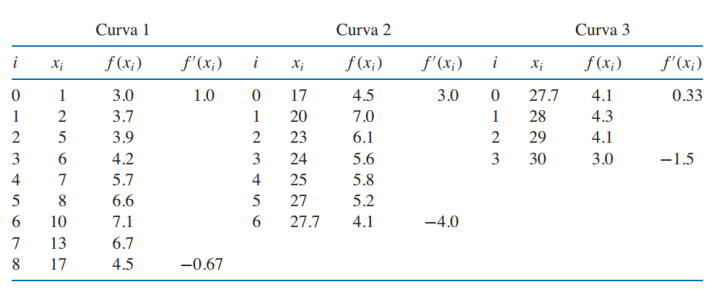

In [16]:
import sympy as sym

def cubic_spline_clamped(xs, ys, fp0, fpn):
    """
    Construye splines cúbicos tipo CLAMPED (derivadas fijadas en los extremos).

    xs  : lista de puntos x
    ys  : lista de puntos f(x)
    fp0 : derivada en x0   (S'(x0))
    fpn : derivada en xn   (S'(xn))

    Retorna una lista de polinomios sympy S_i(x)
    para cada intervalo [x_i, x_{i+1}].
    """

    n = len(xs) - 1
    h = [xs[i+1] - xs[i] for i in range(n)]

    # --- Paso 1: vector alpha ---
    alpha = [0]*(n+1)
    alpha[0] = 3*( (ys[1]-ys[0]) / h[0] - fp0 )
    alpha[n] = 3*( fpn - (ys[n]-ys[n-1]) / h[n-1] )

    for i in range(1, n):
        alpha[i] = 3*( (ys[i+1]-ys[i]) / h[i] - (ys[i]-ys[i-1]) / h[i-1] )

    # --- Paso 2: factor LU simplificado (tridiagonal) ---
    l = [0]*(n+1)
    mu = [0]*(n+1)
    z = [0]*(n+1)

    l[0] = 2*h[0]
    mu[0] = 0.5
    z[0] = alpha[0] / l[0]

    for i in range(1, n):
        l[i] = 2*(xs[i+1]-xs[i-1]) - h[i-1]*mu[i-1]
        mu[i] = h[i] / l[i]
        z[i] = (alpha[i] - h[i-1]*z[i-1]) / l[i]

    l[n] = h[n-1] * (2 - mu[n-1])
    z[n] = (alpha[n] - h[n-1]*z[n-1]) / l[n]

    # --- Paso 3: resolver c, b, d ---
    c = [0]*(n+1)
    b = [0]*n
    d = [0]*n
    a = [ys[i] for i in range(n)]

    c[n] = z[n]
    for j in range(n-1, -1, -1):
        c[j] = z[j] - mu[j]*c[j+1]
        b[j] = (ys[j+1]-ys[j]) / h[j] - h[j]*(c[j+1] + 2*c[j]) / 3
        d[j] = (c[j+1] - c[j]) / (3*h[j])

    # --- Paso 4: construir polinomios S_j(x) ---
    x = sym.symbols('x')
    splines = []
    for j in range(n):
        S = a[j] + b[j]*(x - xs[j]) + c[j]*(x - xs[j])**2 + d[j]*(x - xs[j])**3
        splines.append(S)

    return splines


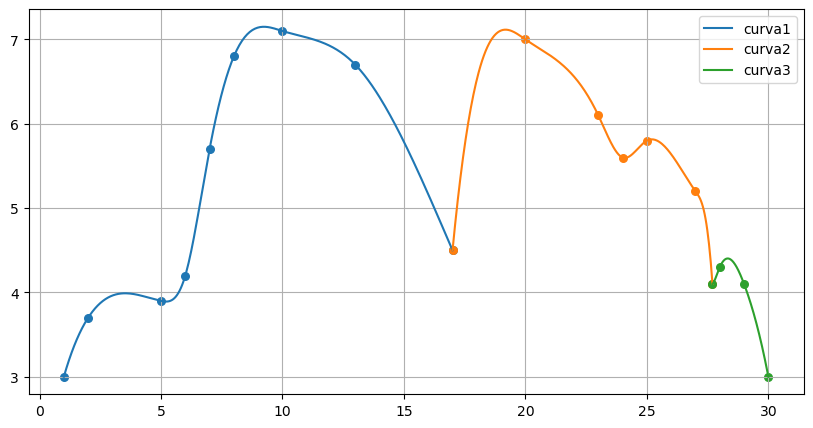

In [17]:


# Curva 1
xs1 = [1, 2, 5, 6, 7, 8, 10, 13, 17]
ys1 = [3.0, 3.7, 3.9, 4.2, 5.7, 6.8, 7.1, 6.7, 4.5]
fp1_a = 1.0
fp1_b = -0.67

# Curva 2
xs2 = [17, 20, 23, 24, 25, 27, 27.7]
ys2 = [4.5, 7.0, 6.1, 5.6, 5.8, 5.2, 4.1]
fp2_a = 3.0
fp2_b = -4.0

# Curva 3
xs3 = [27.7, 28, 29, 30]
ys3 = [4.1, 4.3, 4.1, 3.0]
fp3_a = 0.33
fp3_b = -1.5


spl1 = cubic_spline_clamped(xs1, ys1, fp1_a, fp1_b)
spl2 = cubic_spline_clamped(xs2, ys2, fp2_a, fp2_b)
spl3 = cubic_spline_clamped(xs3, ys3, fp3_a, fp3_b)



import numpy as np
import matplotlib.pyplot as plt

def plot_spline(xs, spl, label):
    xx = np.linspace(xs[0], xs[-1], 300)
    yy = []

    for x in xx:
        for i in range(len(xs)-1):
            if xs[i] <= x <= xs[i+1]:
                yy.append(spl[i].subs('x', x))
                break

    plt.plot(xx, yy, label=label)
    plt.scatter(xs, ys1 if label=='curva1' else ys2 if label=='curva2' else ys3, s=30)


plt.figure(figsize=(10,5))
plot_spline(xs1, spl1, "curva1")
plot_spline(xs2, spl2, "curva2")
plot_spline(xs3, spl3, "curva3")

plt.legend()
plt.grid()
plt.show()


# Link de Repositorio 

https://github.com/CelesteLascano017/Tarea_Splines_C-bicos.git